In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [5]:
bil = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/billboard/billboard_weekly.pkl')
bil['uri'] = 'spotify:track:' + bil['song_id']

In [4]:
audio = pd.read_pickle('/Users/kohtaasakura/PyDev/grad_thesis/spotify_data/billboard_audio_features.pkl')
audio = audio.drop_duplicates()

In [6]:
merged = pd.merge(bil, audio, how='left', on='uri')
merged.dropna(inplace=True)

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254867 entries, 0 to 254886
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              254867 non-null  object 
 1   song              254867 non-null  object 
 2   artist            254867 non-null  object 
 3   song_id           254867 non-null  object 
 4   uri               254867 non-null  object 
 5   acousticness      254867 non-null  float64
 6   danceability      254867 non-null  float64
 7   duration_ms       254867 non-null  float64
 8   energy            254867 non-null  float64
 9   instrumentalness  254867 non-null  float64
 10  key               254867 non-null  float64
 11  liveness          254867 non-null  float64
 12  loudness          254867 non-null  float64
 13  mode              254867 non-null  float64
 14  speechiness       254867 non-null  float64
 15  tempo             254867 non-null  float64
 16  time_signature    25

In [8]:
merged['date'] = pd.to_datetime(merged['date'])
merged['month'] = merged['date'].dt.strftime('%Y-%m')
merged['month'] = pd.to_datetime(merged['month'])
monthly_df = merged.groupby('month').mean()
monthly_df = monthly_df.reset_index()
monthly_df = monthly_df[('1975-01-01' <= monthly_df['month']) & (monthly_df['month'] <= '2021-10-01')]
monthly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_76374/1109325218.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_df = merged.groupby('month').mean()


,month,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
24,1975-01-01,0.358626,0.591538,224563.8050,0.579553,0.064224,5.0625,0.197377,-10.259368,0.8125,0.052111,115.325083,3.9575,0.672567
25,1975-02-01,0.368940,0.588253,220808.0600,0.588122,0.050941,5.4350,0.181158,-10.012720,0.8600,0.050159,115.271552,3.9500,0.665122
26,1975-03-01,0.334843,0.590070,229350.4920,0.581048,0.054995,5.8280,0.184357,-10.316240,0.8400,0.050184,114.686858,3.9220,0.664684
27,1975-04-01,0.338728,0.580120,236438.6350,0.551515,0.069511,6.1125,0.158960,-10.934342,0.7850,0.052581,117.653617,3.9000,0.653632
28,1975-05-01,0.337907,0.571930,234010.9940,0.587851,0.076120,5.7140,0.163500,-10.626060,0.7500,0.057598,121.127004,3.9060,0.668920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,2021-06-01,0.236636,0.663382,192765.3875,0.604500,0.000449,5.2550,0.179318,-6.803228,0.6750,0.142282,122.396225,3.9575,0.464047
582,2021-07-01,0.217580,0.651402,193346.3260,0.635346,0.002264,5.2460,0.193207,-6.248534,0.6860,0.114297,123.421260,3.9820,0.499031
583,2021-08-01,0.210171,0.657075,193621.0700,0.642460,0.006846,5.3675,0.180522,-6.190460,0.6825,0.110391,124.751413,3.9675,0.523641
584,2021-09-01,0.213370,0.642172,205435.6775,0.638335,0.002790,5.3075,0.183702,-6.215815,0.7025,0.122931,124.047017,3.9625,0.495950


## Period Split

In [9]:
before = monthly_df[('1975-01-01' <= monthly_df['month']) & (monthly_df['month'] < '2005-02-12')]
after = monthly_df[monthly_df['month'] >= '2005-02-12']

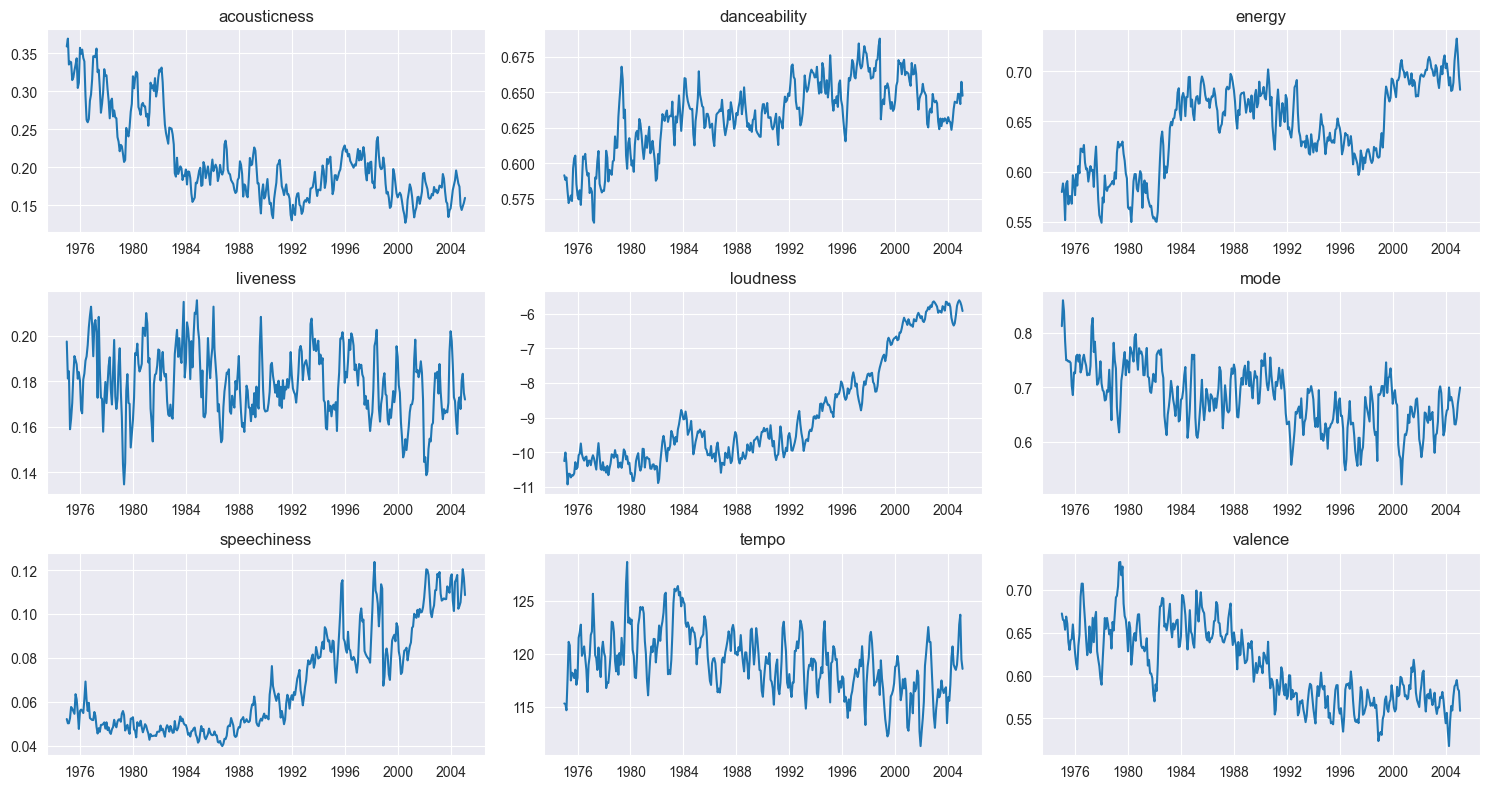

In [13]:
fig = plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4= fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x = before['month']

y1 = before['acousticness']
y2 = before['danceability']
y3 = before['energy']
y4 = before['liveness']
y5 = before['loudness']
y6 = before['mode']
y7 = before['speechiness']
y8 = before['tempo']
y9 = before['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)


ax1.set_title('acousticness')
ax2.set_title('danceability')
ax3.set_title('energy')
ax4.set_title('liveness')
ax5.set_title('loudness')
ax6.set_title('mode')
ax7.set_title('speechiness')
ax8.set_title('tempo')
ax9.set_title('valence')


fig.tight_layout()
plt.show()

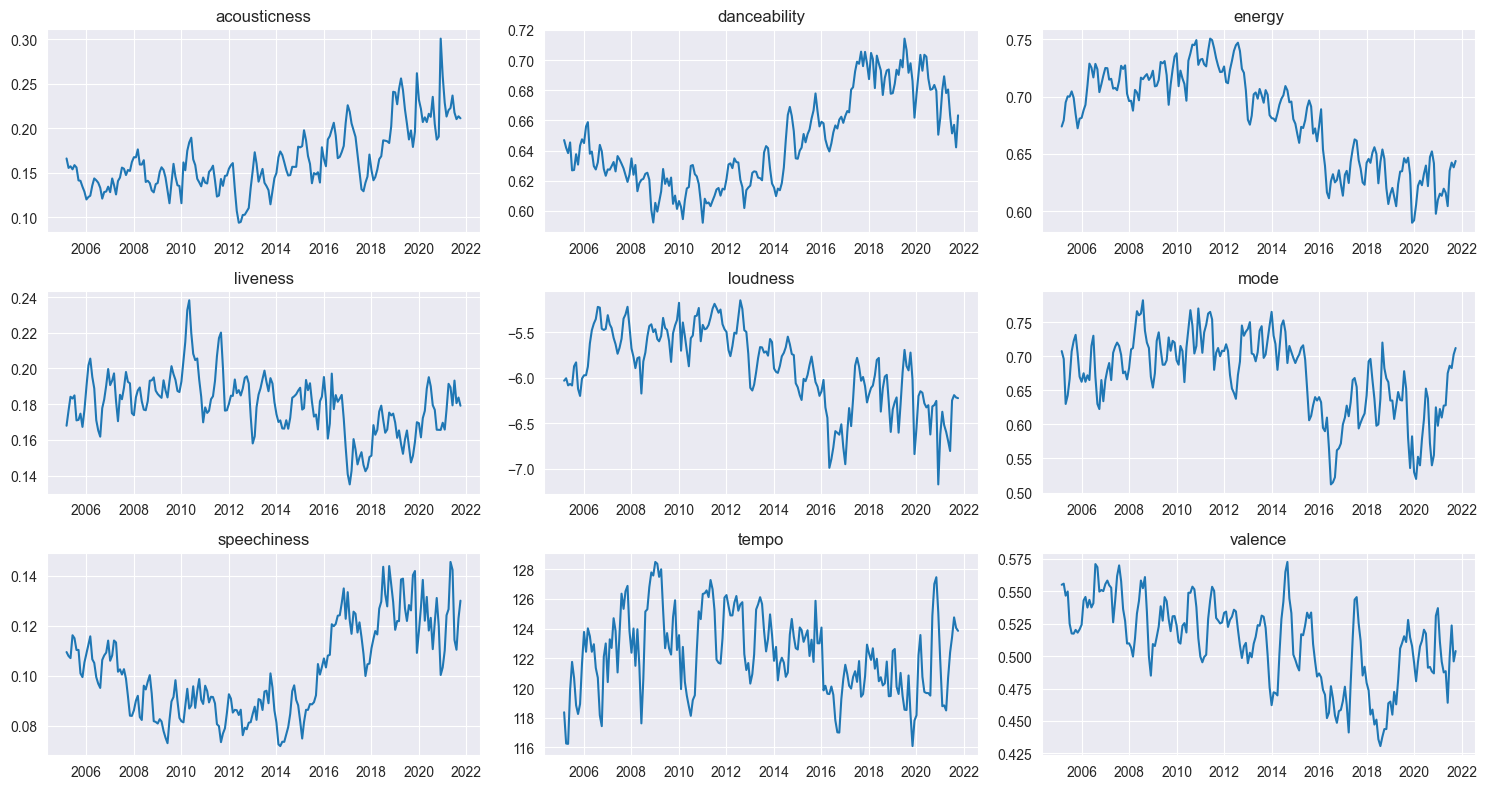

In [14]:
fig = plt.figure(figsize=[15, 8])

ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)
ax4= fig.add_subplot(3, 3, 4)
ax5 = fig.add_subplot(3, 3, 5)
ax6 = fig.add_subplot(3, 3, 6)
ax7 = fig.add_subplot(3, 3, 7)
ax8 = fig.add_subplot(3, 3, 8)
ax9 = fig.add_subplot(3, 3, 9)

x = after['month']

y1 = after['acousticness']
y2 = after['danceability']
y3 = after['energy']
y4 = after['liveness']
y5 = after['loudness']
y6 = after['mode']
y7 = after['speechiness']
y8 = after['tempo']
y9 = after['valence']

ax1.plot(x, y1)
ax2.plot(x, y2)
ax3.plot(x, y3)
ax4.plot(x, y4)
ax5.plot(x, y5)
ax6.plot(x, y6)
ax7.plot(x, y7)
ax8.plot(x, y8)
ax9.plot(x, y9)


ax1.set_title('acousticness')
ax2.set_title('danceability')
ax3.set_title('energy')
ax4.set_title('liveness')
ax5.set_title('loudness')
ax6.set_title('mode')
ax7.set_title('speechiness')
ax8.set_title('tempo')
ax9.set_title('valence')


fig.tight_layout()
plt.show()

In [16]:
unemp = pd.read_csv('/Users/kohtaasakura/PyDev/grad_thesis/economic_indicators/unemployment_rate.csv')
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
before_unemp = unemp[('1975-01-01' <= unemp['DATE']) & (unemp['DATE'] < '2005-02-12')]
after_unemp = unemp[('2005-02-12' <= unemp['DATE']) & (unemp['DATE'] <= '2021-10-01')]

## Unit Root Test

In [12]:
adf_before = before.drop(columns=['month', 'duration_ms', 'instrumentalness', 'key', 'time_signature'])

for col in adf_before.columns:
    adf_test = adfuller(before[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical values :')
    for k, v in adf_test[4].items():
        print('\t', k, v)

acousticness
ADF Statistic: -2.329174
p-value: 0.162731
Critical values :
	 1% -3.448905534655263
	 5% -2.8697161816205705
	 10% -2.5711258103550882
danceability
ADF Statistic: -2.996837
p-value: 0.035191
Critical values :
	 1% -3.448853029339765
	 5% -2.869693115704379
	 10% -2.571113512498422
energy
ADF Statistic: -2.007467
p-value: 0.283309
Critical values :
	 1% -3.448905534655263
	 5% -2.8697161816205705
	 10% -2.5711258103550882
liveness
ADF Statistic: -7.109377
p-value: 0.000000
Critical values :
	 1% -3.448645946352023
	 5% -2.869602139060357
	 10% -2.5710650077160495
loudness
ADF Statistic: 0.052926
p-value: 0.962696
Critical values :
	 1% -3.448853029339765
	 5% -2.869693115704379
	 10% -2.571113512498422
mode
ADF Statistic: -3.849036
p-value: 0.002444
Critical values :
	 1% -3.448853029339765
	 5% -2.869693115704379
	 10% -2.571113512498422
speechiness
ADF Statistic: -0.156882
p-value: 0.943470
Critical values :
	 1% -3.4490648539347544
	 5% -2.8697861692116478
	 10% -2.5711

In [15]:
adf_after = after.drop(columns=['month', 'duration_ms', 'instrumentalness', 'key', 'time_signature'])

for col in adf_after.columns:
    adf_test = adfuller(after[col])

    print(col)
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical values :')
    for k, v in adf_test[4].items():
        print('\t', k, v)

acousticness
ADF Statistic: -0.989935
p-value: 0.756918
Critical values :
	 1% -3.466398230774071
	 5% -2.8773796387256514
	 10% -2.575213838610586
danceability
ADF Statistic: -2.104440
p-value: 0.242733
Critical values :
	 1% -3.4636447617687436
	 5% -2.8761761179270766
	 10% -2.57457158581854
energy
ADF Statistic: -0.335310
p-value: 0.920352
Critical values :
	 1% -3.465811691080702
	 5% -2.877123351472649
	 10% -2.5750770662586864
liveness
ADF Statistic: -4.851228
p-value: 0.000043
Critical values :
	 1% -3.4638151713286316
	 5% -2.876250632135043
	 10% -2.574611347821651
loudness
ADF Statistic: -1.516473
p-value: 0.525347
Critical values :
	 1% -3.4648754262570978
	 5% -2.876714157488788
	 10% -2.574858699001736
mode
ADF Statistic: -2.378237
p-value: 0.147973
Critical values :
	 1% -3.466398230774071
	 5% -2.8773796387256514
	 10% -2.575213838610586
speechiness
ADF Statistic: -1.056010
p-value: 0.732292
Critical values :
	 1% -3.466398230774071
	 5% -2.8773796387256514
	 10% -2.575

In [19]:
adf_test = adfuller(before_unemp['UNRATE'])

print(col)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

acousticness
ADF Statistic: -2.552855
p-value: 0.103138
Critical values :
	 1% -3.44880082033912
	 5% -2.869670179576637
	 10% -2.5711012838861036


In [20]:
adf_test = adfuller(after_unemp['UNRATE'])

print(col)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical values :')
for k, v in adf_test[4].items():
    print('\t', k, v)

acousticness
ADF Statistic: -2.622414
p-value: 0.088453
Critical values :
	 1% -3.4636447617687436
	 5% -2.8761761179270766
	 10% -2.57457158581854


## Regression

### Before February 12, 2005

In [21]:
cycle, trend = sm.tsa.filters.hpfilter(before_unemp.UNRATE, 129600)
before_unemp_decomp  = before_unemp[['UNRATE']]
before_unemp_decomp['cycle'] = cycle
before_unemp_decomp['trend'] = trend

In [24]:
cycle, trend = sm.tsa.filters.hpfilter(before.acousticness, 129600)
acousticness_decomp  = before[['acousticness']]
acousticness_decomp['cycle'] = cycle
acousticness_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_76374/939805304.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acousticness_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_76374/939805304.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acousticness_decomp['trend'] = trend


In [25]:
x = before_unemp_decomp['UNRATE']
x = sm.add_constant(x)
y = acousticness_decomp['cycle']
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7923
Date:                Mon, 23 Jan 2023   Prob (F-statistic):              0.374
Time:                        22:35:09   Log-Likelihood:                 822.64
No. Observations:                 362   AIC:                            -1641.
Df Residuals:                     360   BIC:                            -1633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.006     -0.868      0.3

In [26]:
cycle, trend = sm.tsa.filters.hpfilter(before.danceability, 129600)
danceability_decomp  = before[['danceability']]
danceability_decomp['cycle'] = cycle
danceability_decomp['trend'] = trend

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_76374/2569770235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_decomp['cycle'] = cycle
/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_76374/2569770235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  danceability_decomp['trend'] = trend


In [27]:
x = before_unemp_decomp['UNRATE']
x = sm.add_constant(x)
y = danceability_decomp['cycle']
y = y.values.reshape(-1, 1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4877
Date:                Mon, 23 Jan 2023   Prob (F-statistic):              0.485
Time:                        22:36:14   Log-Likelihood:                 1048.0
No. Observations:                 362   AIC:                            -2092.
Df Residuals:                     360   BIC:                            -2084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0022      0.003      0.681      0.4